In [1]:

from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

In [21]:
#Abrimos el fits de las estrellas
star_1b = fits.open('Star1_B.fits')[0]
star_1v = fits.open('Star1_V.fits')[0]
star_2b = fits.open('Star2_B.fits')[0]
star_2v = fits.open('Star2_V.fits')[0]
#data y header
data = star_1b.data
header = star_1b.header

header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{da52125b-74f6-49

In [22]:
#Threshold, para cada estrella
threshold_1b = detect_threshold(star_1b.data, nsigma = 5)
threshold_1v = detect_threshold(star_1v.data, nsigma = 5)
threshold_2b = detect_threshold(star_2b.data, nsigma = 5)
threshold_2v = detect_threshold(star_2v.data, nsigma = 5)
#Detectamos fuentes
sour_1b = detect_sources(star_1b.data, threshold_1b, npixels=50)
sour_1v = detect_sources(star_1v.data, threshold_1v, npixels=50)
sour_2b = detect_sources(star_2b.data, threshold_2b, npixels=50)
sour_2v = detect_sources(star_1v.data, threshold_2v, npixels=50)

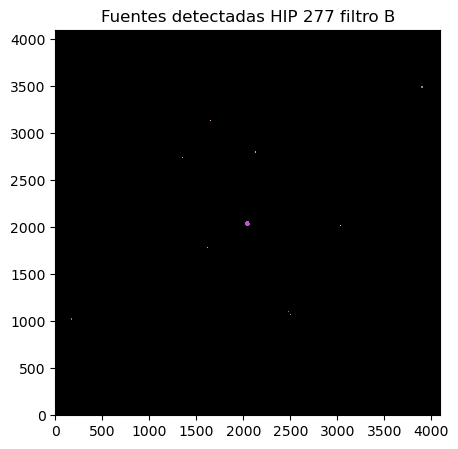

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 10
labels: [ 1  2  3  4  5  6  7  8  9 10]


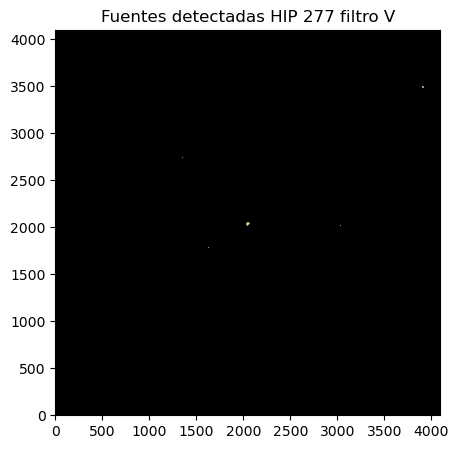

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 8
labels: [1 2 3 4 5 6 7 8]


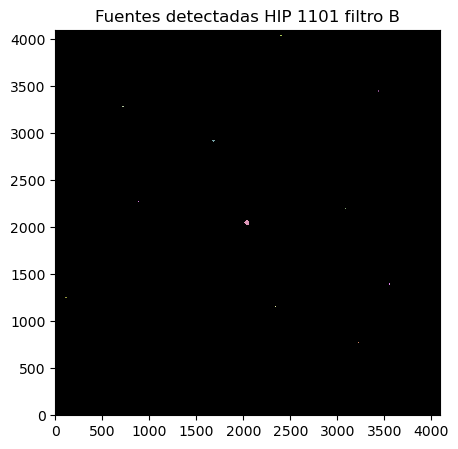

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 13
labels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


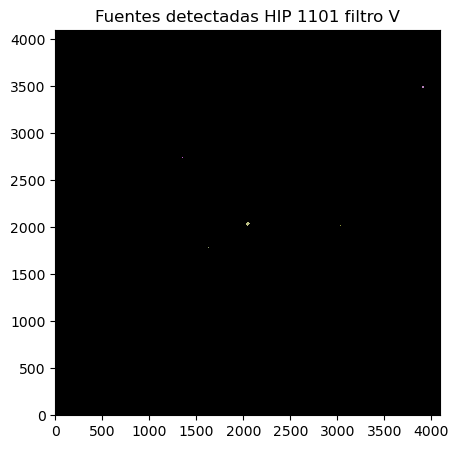

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 8
labels: [1 2 3 4 5 6 7 8]


In [23]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sour_1b = sour_1b.make_cmap(seed=123)
cmap_sour_1v = sour_1v.make_cmap(seed=123)
cmap_sour_2b = sour_2b.make_cmap(seed=123)
cmap_sour_2v = sour_2v.make_cmap(seed=123)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_1b, origin='lower', cmap=cmap_sour_1b, interpolation='nearest')
plt.title('Fuentes detectadas HIP 277 filtro B')
plt.show()
print(sour_1b)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_1v, origin='lower', cmap=cmap_sour_1v, interpolation='nearest')
plt.title('Fuentes detectadas HIP 277 filtro V')
plt.show()
print(sour_1v)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_2b, origin='lower', cmap=cmap_sour_2b, interpolation='nearest')
plt.title('Fuentes detectadas HIP 1101 filtro B')
plt.show()
print(sour_2b)

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_2v, origin='lower', cmap=cmap_sour_2v, interpolation='nearest')
plt.title('Fuentes detectadas HIP 1101 filtro V')
plt.show()
print(sour_2v)

In [24]:
#Obtenemos el catálogo de la primera
cat_1b = SourceCatalog(data, sour_1b)
#Lo pasamos a tabla y lo mostramos
tbl_1b = cat_1b.to_table()
tbl_1b

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,176.5752521074396,1019.7368239021661,None,166,186,1011,1028,258.0,4.14308724569323,3.171969465844313,10.869968136718834,0.6433106225369738,15.20548152923584,182.0935516357422,0.0,15895.371398925781,nan,18439.08326486337,nan
2,2503.8747388798265,1067.1796990976197,None,2497,2509,1064,1071,55.0,2.834064502643169,1.7282144292498824,3.1615006554547853,0.7925548209942743,15.317797660827637,32.0369758605957,0.0,1099.720030784607,nan,3420.8389509093113,nan
3,2486.448651913088,1103.9439241442524,None,2479,2492,1100,1108,91.0,3.335817998303991,2.012679836227238,5.665677997479658,0.7974733200134931,15.428679466247559,38.47940444946289,0.0,2189.994330406189,nan,4867.819669991924,nan
4,1622.922748494046,1785.3510151213031,None,1612,1632,1777,1793,238.0,4.269678925515606,3.034168175776314,14.066504465221204,0.7035644431461883,15.296687126159668,173.40638732910156,0.0,13197.379608154297,nan,13333.25872486088,nan
5,2045.8416455562071,2035.9266552765503,None,2017,2075,2005,2065,2136.0,5.823203140889464,4.973051019126162,17.711424320598578,0.5202629880019207,15.201695442199707,12232.30078125,0.0,1236592.6837854385,nan,1207926.5702658119,nan
6,3034.4784665196735,2013.3171901905816,None,3027,3041,2008,2019,118.0,3.679744512137104,2.2251127618584956,10.669830216042104,0.7964592627798567,15.392321586608887,64.57251739501953,0.0,3532.037266731262,nan,5705.786414085493,nan
7,1354.2788635862182,2735.894937112262,None,1344,1362,2729,2742,183.0,3.9352899096053586,2.7023233847028716,10.687390524123604,0.7269505748070418,15.319518089294434,114.4680404663086,0.0,7904.39305973053,nan,9609.826814632243,nan
8,2133.3687222376147,2798.291318985148,None,2124,2142,2791,2805,180.0,3.974994911555687,2.7586496815296946,11.958151187393367,0.7199742204456361,15.3637056350708,103.6877212524414,0.0,7298.304750442505,nan,7299.192522573929,nan


In [25]:
#Catalogo de las 4
# Catálogo para HIP117678 
cat_1b = SourceCatalog(star_1b.data, sour_1b)
cat_1v = SourceCatalog(star_1v.data, sour_1v)
# Catálogo para HIP116375  
cat_2b = SourceCatalog(star_2b.data, sour_2b)
cat_2v = SourceCatalog(star_2v.data, sour_2v)

#Lo pasamos a tabla y lo mostramos
tbl_1b = cat_1b.to_table()
tbl_1v = cat_1v.to_table()
tbl_2b = cat_2b.to_table()
tbl_2v = cat_2v.to_table()

print(tbl_1b)
print(tbl_1v)
print(tbl_2b)
print(tbl_2v)

label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
----- ------------------ ------------------ ... ------------------ ------------
    1  176.5752521074396 1019.7368239021661 ...  18439.08326486337          nan
    2 2503.8747388798265 1067.1796990976197 ... 3420.8389509093113          nan
    3  2486.448651913088 1103.9439241442524 ...  4867.819669991924          nan
    4  1622.922748494046 1785.3510151213031 ...  13333.25872486088          nan
    5 2045.8416455562071 2035.9266552765503 ... 1207926.5702658119          nan
    6 3034.4784665196735 2013.3171901905816 ...  5705.786414085493          nan
    7 1354.2788635862182  2735.894937112262 ...  9609.826814632243          nan
    8 2133.3687222376147  2798.291318985148 ...  7299.192522573929          nan
    9  1652.177820317746  3127.649908324739 ...  5862.135344900675          nan
   10  3908.428251416991  3489.900241608

In [26]:
# Ahora extraemos las columnas
tabla_1b = tbl_1b['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_1v = tbl_1v['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_2b = tbl_2b['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla_2v = tbl_2v['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
print(tabla_1b)
print(tabla_1v)
print(tabla_2b)
print(tabla_2v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  176.5752521074396 1019.7368239021661  258.0 15895.371398925781
    2 2503.8747388798265 1067.1796990976197   55.0  1099.720030784607
    3  2486.448651913088 1103.9439241442524   91.0  2189.994330406189
    4  1622.922748494046 1785.3510151213031  238.0 13197.379608154297
    5 2045.8416455562071 2035.9266552765503 2136.0 1236592.6837854385
    6 3034.4784665196735 2013.3171901905816  118.0  3532.037266731262
    7 1354.2788635862182  2735.894937112262  183.0   7904.39305973053
    8 2133.3687222376147  2798.291318985148  180.0  7298.304750442505
    9  1652.177820317746  3127.649908324739  140.0  4722.386731147766
   10  3908.428251416991  3489.900241608406  444.0  55872.14008140564
label     xcentroid          ycentroid       area     segment_flux   
                    

In [27]:
#obtenemos flujo real
tabla_1b['segment_flux'] = tabla_1b['segment_flux']/header['EXPTIME']
tabla_1v['segment_flux'] = tabla_1v['segment_flux']/header['EXPTIME']
tabla_2b['segment_flux'] = tabla_2b['segment_flux']/header['EXPTIME']
tabla_2v['segment_flux'] = tabla_2v['segment_flux']/header['EXPTIME']
#mostamos
print(tabla_1b)
print(tabla_1v)
print(tabla_2b)
print(tabla_2v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  176.5752521074396 1019.7368239021661  258.0 3179.0742797851562
    2 2503.8747388798265 1067.1796990976197   55.0 219.94400615692138
    3  2486.448651913088 1103.9439241442524   91.0  437.9988660812378
    4  1622.922748494046 1785.3510151213031  238.0 2639.4759216308594
    5 2045.8416455562071 2035.9266552765503 2136.0  247318.5367570877
    6 3034.4784665196735 2013.3171901905816  118.0  706.4074533462524
    7 1354.2788635862182  2735.894937112262  183.0  1580.878611946106
    8 2133.3687222376147  2798.291318985148  180.0  1459.660950088501
    9  1652.177820317746  3127.649908324739  140.0  944.4773462295532
   10  3908.428251416991  3489.900241608406  444.0 11174.428016281128
label     xcentroid          ycentroid       area     segment_flux   
                    

In [28]:
#Magnitud calibrada
tabla_1b['magnitude'] = zp_mean_b - 2.5 * np.log(tabla_1b['segment_flux'])
tabla_1v['magnitude'] = zp_mean_v - 2.5 * np.log(tabla_1v['segment_flux'])
tabla_2b['magnitude'] = zp_mean_b - 2.5 * np.log(tabla_2b['segment_flux'])
tabla_2v['magnitude'] = zp_mean_v - 2.5 * np.log(tabla_2v['segment_flux'])

print(tabla_1b)
print(tabla_1v)
print(tabla_2b)
print(tabla_2v)

label     xcentroid      ...    segment_flux         magnitude      
                         ...                                        
----- ------------------ ... ------------------ --------------------
    1  176.5752521074396 ... 3179.0742797851562   10.814051291468207
    2 2503.8747388798265 ... 219.94400615692138   17.491482116267715
    3  2486.448651913088 ...  437.9988660812378   15.769373803695917
    4  1622.922748494046 ... 2639.4759216308594   11.279075452739654
    5 2045.8416455562071 ...  247318.5367570877 -0.07116641065938722
    6 3034.4784665196735 ...  706.4074533462524   14.574434106480219
    7 1354.2788635862182 ...  1580.878611946106   12.560574470054437
    8 2133.3687222376147 ...  1459.660950088501   12.760015953072159
    9  1652.177820317746 ...  944.4773462295532    13.84833535319055
   10  3908.428251416991 ... 11174.428016281128    7.671456522623579
label     xcentroid      ...    segment_flux        magnitude     
                         ...        

In [29]:
#Buscamos la fuente que es la estrella (mayor área)
star_1b_index = np.argmax(tabla_1b['area'])
star_1v_index = np.argmax(tabla_1v['area'])
star_2b_index = np.argmax(tabla_2b['area'])
star_2v_index = np.argmax(tabla_2v['area'])

#Obtenemos flujo
flux_star_1b = tabla_1b['segment_flux'][star_1b_index]
flux_star_1v = tabla_1v['segment_flux'][star_1v_index]
flux_star_2b = tabla_2b['segment_flux'][star_2b_index]
flux_star_2v = tabla_2v['segment_flux'][star_2v_index]

#Magnitud media
mag_1b = -2.5 * np.log(flux_star_1b)
mag_1v = -2.5 * np.log(flux_star_1v)
mag_2b = -2.5 * np.log(flux_star_2b)
mag_2v = -2.5 * np.log(flux_star_2v)

#Zeropoint (depende del filtro y la estrella)
zp_1b =  8.05 - mag_1b
zp_1v =  7.06 - mag_1v
zp_2b =  8.17 - mag_2b
zp_2v =  7.08 - mag_2v

zp_mean_b = (zp_1b + zp_2b)/2
zp_mean_v = (zp_1v + zp_2v)/2

print(zp_mean_b,zp_mean_v)

39.022104169660096 39.34044722557779
